# Predict the rating of apps in GooglePlayStore

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xg
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew inst

In [3]:
plt.style.use('seaborn')
sns.set(font_scale=1.8)
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

## Read dataset

In [4]:
df = pd.read_csv('../625 python/googleAppClean.csv')

In [5]:
df.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content.Rating    0
Genres            0
Last.Updated      0
Current.Ver       0
Android.Ver       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 14 columns):
Unnamed: 0        9658 non-null int64
App               9658 non-null object
Category          9658 non-null object
Rating            9658 non-null float64
Reviews           9658 non-null int64
Size              9658 non-null float64
Installs          9658 non-null float64
Type              9658 non-null object
Price             9658 non-null float64
Content.Rating    9658 non-null object
Genres            9658 non-null object
Last.Updated      9658 non-null object
Current.Ver       9658 non-null float64
Android.Ver       9658 non-null float64
dtypes: float64(6), int64(2), object(6)
memory usage: 1.0+ MB


In [7]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
0,1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,1183,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0,4.0
1,2,Coloring book moana,ART_AND_DESIGN,3.9,5924,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0
2,3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5681,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2,4.0
3,4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,1947,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,1.8,4.2
4,5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,5924,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


 ## Data preprosessing

In [8]:
df = df.iloc[:,1:]
df_dummy = df.iloc[:,1:]

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,1183,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,5924,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,5681,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2,4.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,1947,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,1.8,4.2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,5924,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


 ## Correlation analysis

In [10]:
df_temp1 = df.drop('App', axis=1)

In [11]:
df_temp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
0,ART_AND_DESIGN,4.1,1183,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0,4.0
1,ART_AND_DESIGN,3.9,5924,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0,4.0
2,ART_AND_DESIGN,4.7,5681,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2,4.0
3,ART_AND_DESIGN,4.5,1947,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,1.8,4.2
4,ART_AND_DESIGN,4.3,5924,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4


In [12]:
data = [
    go.Heatmap(
        z = df_temp1.corr().values,
        x = df_temp1.corr().columns.values,
        y = df_temp1.corr().columns.values,
        colorscale='Greens',
        reversescale=False,
    )
]

layout = go.Layout(
    title='Pearson Correlation of numeric features',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='' ),
    width = 600, height = 600,
    margin = dict(
        l = 80
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [13]:
labelencoder_X = LabelEncoder()
df.iloc[:,1:2] = labelencoder_X.fit_transform(df.iloc[:,1:2])
onehotencoder = OneHotEncoder(categorical_features = [1])
df.iloc[:,6:7] = labelencoder_X.fit_transform(df.iloc[:,6:7])
onehotencoder = OneHotEncoder(categorical_features = [6])
df.iloc[:,8:9] = labelencoder_X.fit_transform(df.iloc[:,8:9])
onehotencoder = OneHotEncoder(categorical_features = [8])
df.iloc[:,9:10] = labelencoder_X.fit_transform(df.iloc[:,9:10])
onehotencoder = OneHotEncoder(categorical_features = [9])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 13 columns):
App               9658 non-null object
Category          9658 non-null int64
Rating            9658 non-null float64
Reviews           9658 non-null int64
Size              9658 non-null float64
Installs          9658 non-null float64
Type              9658 non-null int64
Price             9658 non-null float64
Content.Rating    9658 non-null int64
Genres            9658 non-null int64
Last.Updated      9658 non-null object
Current.Ver       9658 non-null float64
Android.Ver       9658 non-null float64
dtypes: float64(6), int64(5), object(2)
memory usage: 981.0+ KB


In [15]:
df_temp2 = df.drop('App', axis=1)

In [16]:
data = [
    go.Heatmap(
        z = df_temp2.corr().values,
        x = df_temp2.corr().columns.values,
        y = df_temp2.corr().columns.values,
        colorscale='YlOrRd',
        reversescale=False,
    )
]

layout = go.Layout(
    title='Pearson Correlation of numeric features',
    xaxis = dict(ticks=''),
    yaxis = dict(ticks='' ),
    width = 800, height = 800,
    margin = dict(
        l = 100
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

## Select features, set target, exclude genres

In [17]:
df_train = df_dummy[['Category','Reviews','Size','Installs','Type','Content.Rating','Current.Ver','Android.Ver']]
target = df['Rating']
df_train = pd.get_dummies(df_train)

In [18]:
df_train.head()

,Reviews,Size,Installs,Current.Ver,Android.Ver,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content.Rating_Adults only 18+,Content.Rating_Everyone,Content.Rating_Everyone 10+,Content.Rating_Mature 17+,Content.Rating_Teen,Content.Rating_Unrated
0,1183,19.0,10000.0,1.0,4.0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,5924,14.0,500000.0,2.0,4.0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,5681,8.7,5000000.0,1.2,4.0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1947,25.0,50000000.0,1.8,4.2,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,5924,2.8,100000.0,1.1,4.4,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [19]:
target.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

In [20]:
def categorize_rating(x):
    if x <= 4.5:
        return 0
    else:
        return 1

In [21]:
target = target.apply(categorize_rating)

In [22]:
target.head()

0    0
1    0
2    1
3    0
4    0
Name: Rating, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.2, random_state=2018, stratify=target)

In [24]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (7726, 46)
X_test shape: (1932, 46)


## Build models (classification)

In [25]:
models = [LogisticRegression(), SVC(), KNeighborsClassifier(3), RandomForestClassifier(), AdaBoostClassifier(), LGBMClassifier(), XGBClassifier()]
kfold = KFold(n_splits=5, random_state=2018)
clf_comparison = pd.DataFrame(columns=['Classfier_name', 'train_score', 'test_score'])
for i, model in enumerate(models):
    clf = model
    cv_result = cross_validate(model, X_train, y_train, cv=kfold, scoring='accuracy')
    clf_comparison.loc[i, 'Classfier_name'] = model.__class__.__name__
    clf_comparison.loc[i, 'train_score'] = cv_result['train_score'].mean()
    clf_comparison.loc[i, 'test_score'] = cv_result['test_score'].mean()

clf_comparison


,Classfier_name,train_score,test_score
0,LogisticRegression,0.823712,0.823713
1,SVC,0.939878,0.820865
2,KNeighborsClassifier,0.864872,0.777633
3,RandomForestClassifier,0.976573,0.817371
4,AdaBoostClassifier,0.8219,0.820606
5,LGBMClassifier,0.867784,0.819441
6,XGBClassifier,0.824683,0.823713


<Figure size 576x396 with 0 Axes>

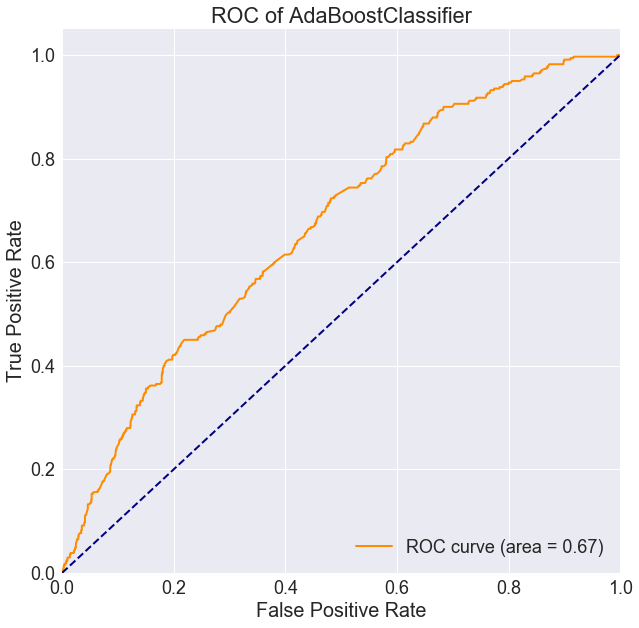

In [26]:
y_score = AdaBoostClassifier().fit(X_train, y_train).decision_function(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of AdaBoostClassifier')
plt.legend(loc="lower right")
plt.show()


